<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_10_10_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [79]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [80]:
apple=pd.DataFrame(data)

### Step 4.  Check out the type of the columns

In [8]:
print(apple.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


In [11]:
print(apple.type) #type으로 볼 수 없다

AttributeError: ignored

### Step 5. Transform the Date column as a datetime type

In [82]:
apple['Date'] = pd.to_datetime(apple.Date)
print(apple.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


### Step 6.  Set the date as the index

In [56]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [18]:
apple.index.is_unique #is_uniuque를 통해 중복값 여부를 확인할 수 있다.

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [57]:
apple.sort_values(by='Date', inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [65]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [63]:
apple_month = apple.resample('BM').mean()
#resample을 통해 시계열 데이터의 주기별 정렬 가능
#buisnessdate => BM 으로 하면 마지막 달이 7/30로 오류 뜸

In [68]:
print(pd.date_range('1980-12-12','2014-07-08', freq='BM'))

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')


In [69]:
head_range = pd.date_range(start=apple.index.max(), end=apple.index.min(), freq='BM')
print(head_range)

DatetimeIndex([], dtype='datetime64[ns]', freq='BM')


### Step 10.  What is the difference in days between the first day and the oldest

In [24]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [72]:
print(pd.date_range('1980-12-12','2014-07-08', freq='BM'))
#403개의 달 존재

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

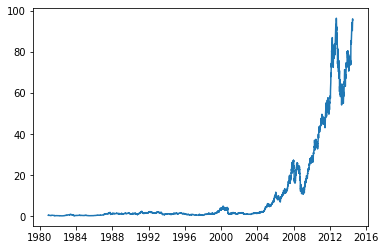

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(apple['Adj Close'])
plt.show()

### BONUS: Create your own question and answer it.

Q. 시간 간격을 인덱스로 지정하여 최초 5일의 데이터를 추출하시오.

In [83]:
apple['ref_date'] = apple['Date'] - apple['Date'].min()
apple.index = apple['ref_date']
print(apple['5 days':].iloc[:5,:5])

               Date   Open   High    Low  Close
ref_date                                       
5 days   1980-12-17  25.87  26.00  25.87  25.87
4 days   1980-12-16  25.37  25.37  25.25  25.25
3 days   1980-12-15  27.38  27.38  27.25  27.25
0 days   1980-12-12  28.75  28.87  28.75  28.75
